<a href="https://colab.research.google.com/github/longgggg1310/Artificial-Intelligence-Challenge1/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data


In [ ]:
cd data


/content/data


In [ ]:
cd ..


/content


In [ ]:
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from random import randint
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow 
from tensorflow.keras import layers

from tensorflow import keras

In [ ]:
cd data


/content/data


In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy

--2021-12-12 03:51:21--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97281936 (93M) [application/octet-stream]
Saving to: ‘umbrella.npy’

umbrella.npy        100%[===================>]  92.77M  46.6MB/s    in 2.0s    

2021-12-12 03:51:24 (46.6 MB/s) - ‘umbrella.npy’ saved [97281936/97281936]

--2021-12-12 03:51:24--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241421904 (230M) [application/octet-stream]
S

In [ ]:
cd ..


/content


In [ ]:
import urllib.request

base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
root = 'data2'
class_names = ['umbrella', 'banana', 'grapes', 'pineapple']
for c in class_names:
    path = base+c+'.npy'
    print(path)
    urllib.request.urlretrieve(path, f'{root}/{c}.npy')
print('Download data sucesss')

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy
Download data sucesss


In [ ]:
test_split = 0.2
max_items_per_class = 10000
x = np.empty([0, 784])
y = np.empty([0])
for i, file in enumerate(class_names):
      data = np.load(f'{root}/{file}.npy')
      data = data[0: max_items_per_class, :]
      labels = np.full(data.shape[0], i)

      x = np.concatenate((x, data), axis=0)
      y = np.append(y, labels)

data = None
labels = None
permutation = np.random.permutation(y.shape[0])
x = x[permutation, :]
y = y[permutation]

  #reshape and inverse the colors 
x = 255 - np.reshape(x, (x.shape[0], 28, 28))

  #separate into training and testing 
test_size  = int(x.shape[0]/100*(test_split*100))

x_test = x[0:test_size, :]
y_test = y[0:test_size]

x_train = x[test_size:x.shape[0], :]
y_train = y[test_size:y.shape[0]]

print('Training Data : ', x_train.shape[0])
print('Testing  Data : ', x_test.shape[0])

Training Data :  32000
Testing  Data :  8000


In [ ]:
X = np.concatenate((x_test,x_train),axis = 0)
y = np.concatenate((y_test,y_train))

In [ ]:
def visualize_classes():
  for i in range(0, 4):
    img_batch = x_train[y_train == i][0:4]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

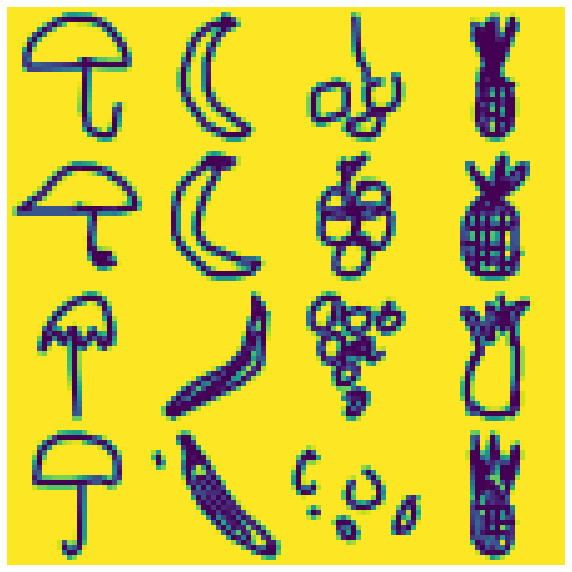

In [ ]:
visualize_classes()


In [ ]:

image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

In [ ]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(30, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(15, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(len(class_names), activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 15)          0         
                                                                 
 flatten (Flatten)           (None, 735)               0

In [ ]:
history = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, epochs=10)


Epoch 1/10
113/113 [==============================] - 22s 185ms/step - loss: 0.5183 - accuracy: 0.8195 - val_loss: 0.2744 - val_accuracy: 0.9091
Epoch 2/10
113/113 [==============================] - 21s 184ms/step - loss: 0.2404 - accuracy: 0.9220 - val_loss: 0.2018 - val_accuracy: 0.9359
Epoch 3/10
113/113 [==============================] - 21s 184ms/step - loss: 0.1890 - accuracy: 0.9392 - val_loss: 0.1712 - val_accuracy: 0.9453
Epoch 4/10
113/113 [==============================] - 21s 183ms/step - loss: 0.1629 - accuracy: 0.9477 - val_loss: 0.1531 - val_accuracy: 0.9516
Epoch 5/10
113/113 [==============================] - 21s 183ms/step - loss: 0.1438 - accuracy: 0.9539 - val_loss: 0.1279 - val_accuracy: 0.9597
Epoch 6/10
113/113 [==============================] - 21s 185ms/step - loss: 0.1283 - accuracy: 0.9589 - val_loss: 0.1236 - val_accuracy: 0.9603
Epoch 7/10
113/113 [==============================] - 21s 185ms/step - loss: 0.1178 - accuracy: 0.9616 - val_loss: 0.1191 - val_ac

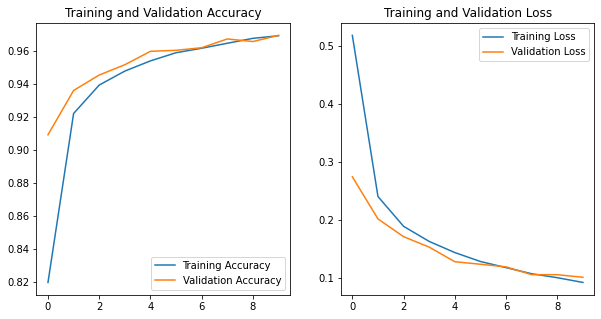

In [ ]:
def plot_history(history):
  
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']

  accuracy = model.history.history['accuracy']
  val_accuracy = model.history.history['val_accuracy']

  epochs_range = np.arange(len(model.history.history['loss']))

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, accuracy, label='Training Accuracy')
  plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  #plt.savefig('./foo.png')
  plt.show()
  
########################
  
plot_history(history)

In [ ]:
model.save('model.h5')